In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

| **Attribute**   | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| N_Days           | Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986. |
| Status           | Status of the patient: C (censored), CL (censored due to liver transplant), or D (death). |
| Drug             | Type of drug: D-penicillamine or placebo.                                      |
| Age              | Age in days.                                                                   |
| Sex              | Gender: M (male) or F (female).                                               |
| Ascites          | Presence of ascites: N (No) or Y (Yes).                                        |
| Hepatomegaly     | Presence of hepatomegaly: N (No) or Y (Yes).                                  |
| Spiders          | Presence of spider angiomas: N (No) or Y (Yes).                              |
| Edema            | Presence of edema: N (no edema and no diuretic therapy), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy). |
| Bilirubin        | Serum bilirubin in [mg/dl].                                                    |
| Cholesterol      | Serum cholesterol in [mg/dl].                                                  |
| Albumin          | Albumin in [gm/dl].                                                           |
| Copper           | Urine copper in [ug/day].                                                     |
| Alk_Phos         | Alkaline phosphatase in [U/liter].                                            |
| SGOT             | SGOT in [U/ml].                                                               |
| Tryglicerides    | Triglycerides in [mg/dl].                                                     |
| Platelets        | Platelets per cubic [ml/1000].                                               |
| Prothrombin      | Prothrombin time in seconds [s].                                              |
| Stage            | Histologic stage of disease (1, 2, or 3).                                      |


In [4]:
print(f'{"Column name":<20} {"Unique values":<10}')
for col in df.columns:
    print(f'{col:<20} {len(df[col].unique()):<10}')

Column name          Unique values
N_Days               549       
Status               3         
Drug                 2         
Age                  510       
Sex                  2         
Ascites              2         
Hepatomegaly         2         
Spiders              2         
Edema                3         
Bilirubin            113       
Cholesterol          220       
Albumin              179       
Copper               197       
Alk_Phos             336       
SGOT                 240       
Tryglicerides        157       
Platelets            295       
Prothrombin          51        
Stage                3         


In [5]:
df.Edema.unique()

array(['N', 'Y', 'S'], dtype=object)

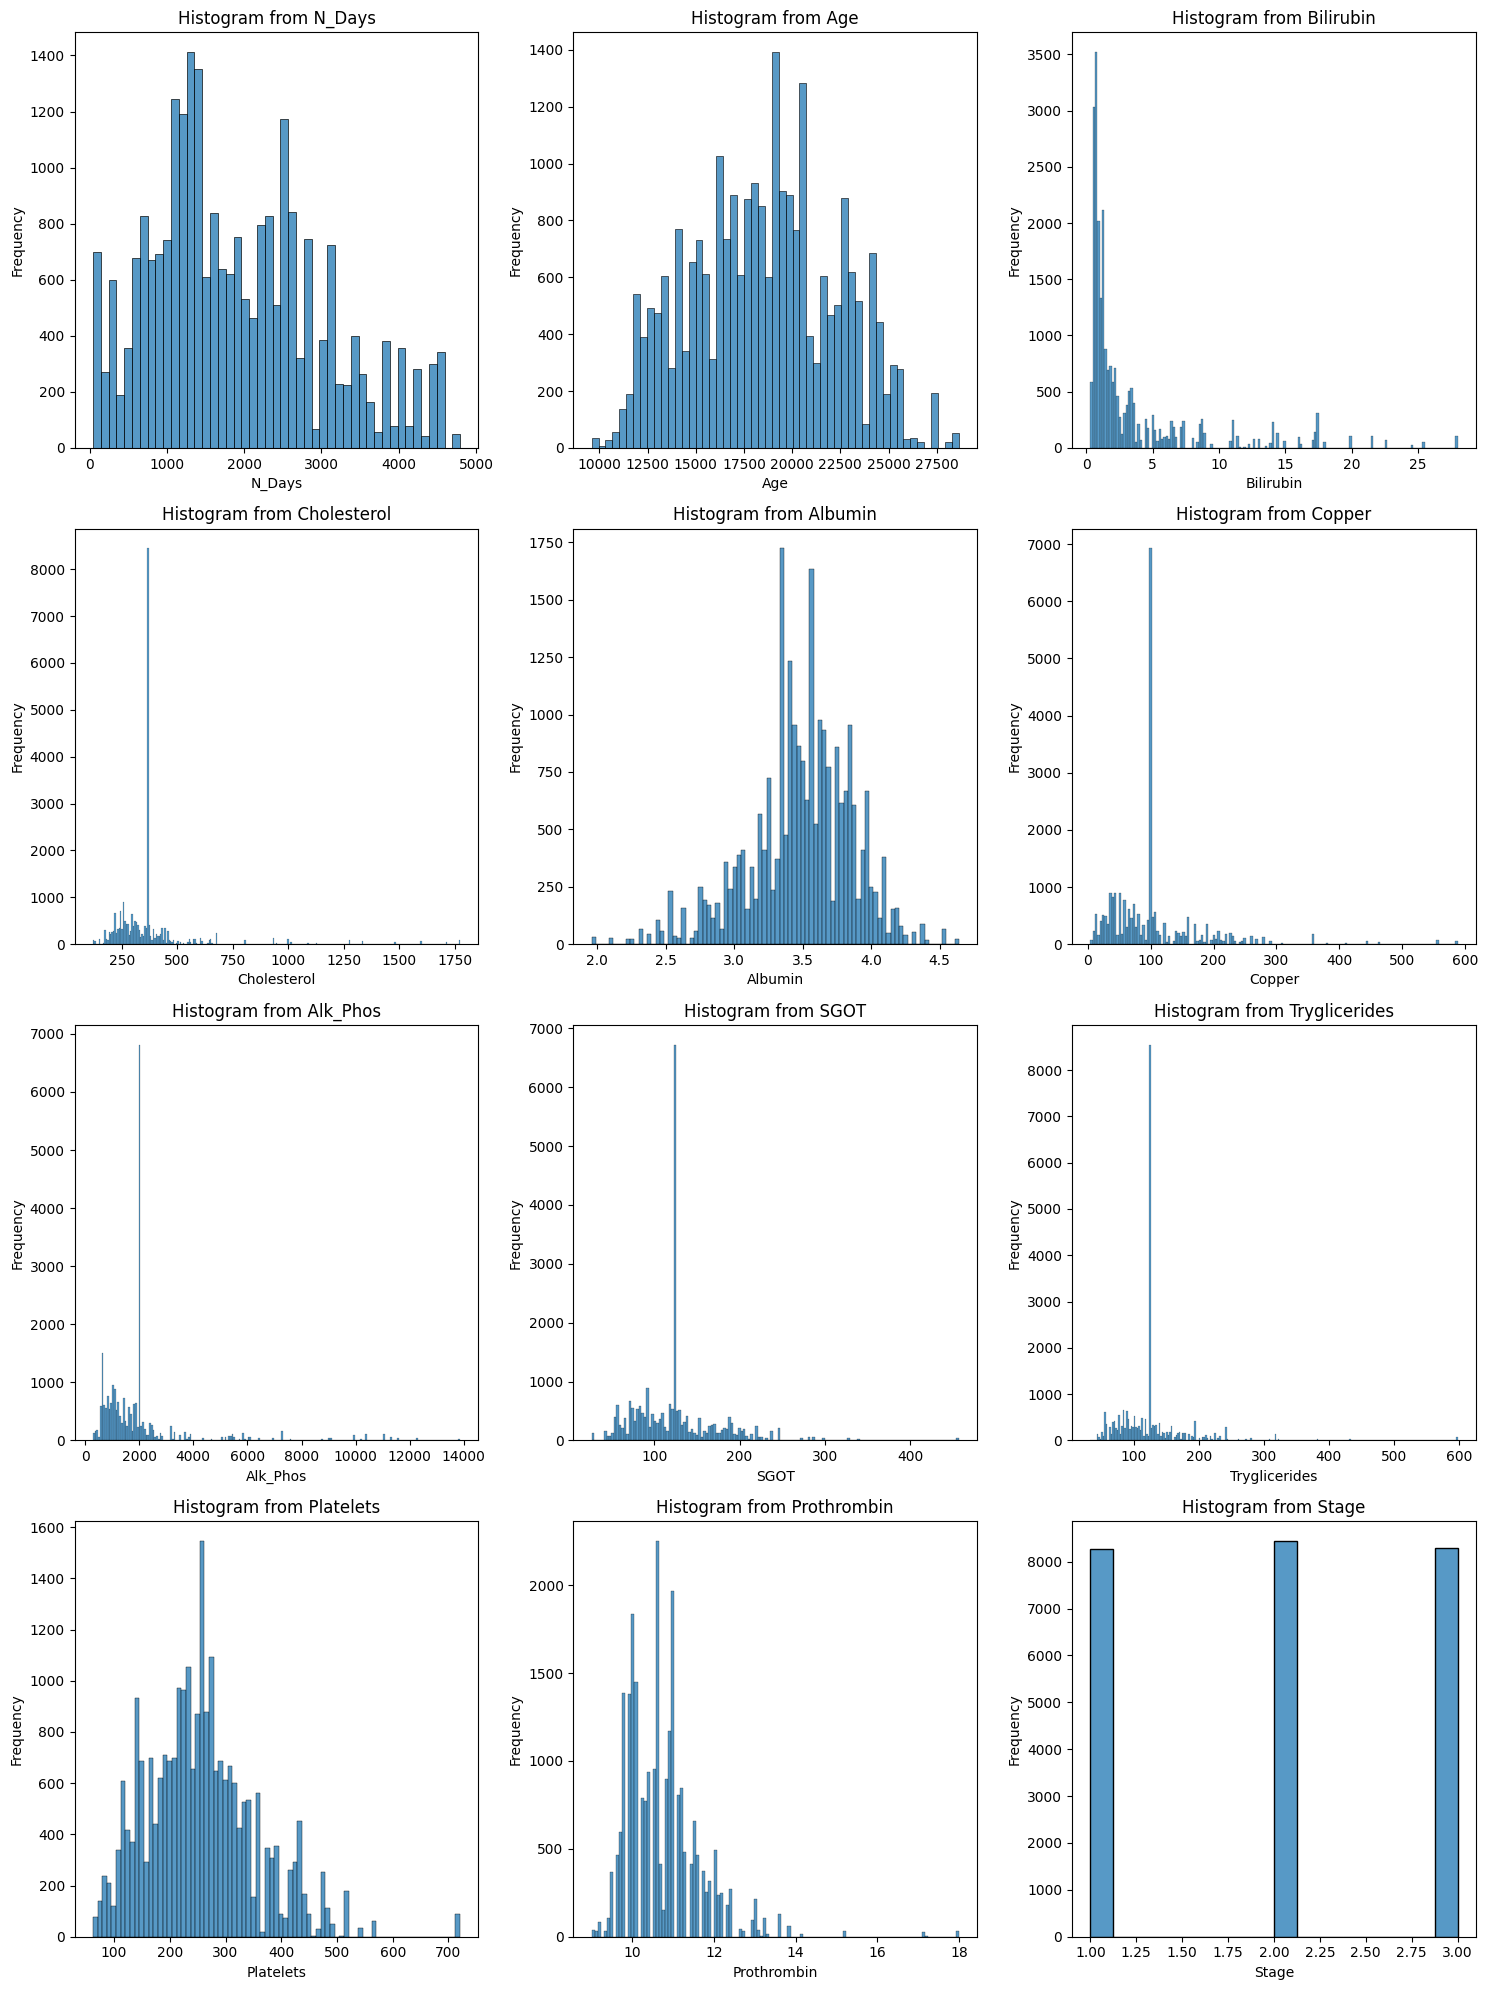

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

numeric_cols = df.select_dtypes(include=['number']).columns

n_cols = 3  
n_rows = math.ceil(len(numeric_cols) / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram from {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
# one-hot encoding for Yes/No 
yes_no_var = ['Ascites','Hepatomegaly','Spiders']
mapping_yes_no = {'Y':1, 'N':0}
df[yes_no_var] = df[yes_no_var].replace(mapping_yes_no)
df['Sex'] = df['Sex'].replace({'M':1, 'F':0})

# one-hot encoding for the rest of categorical data
categ_vars = ['Status', 'Drug', 'Edema']
df_clean = pd.get_dummies(df, columns=categ_vars, dtype=int)

/var/folders/z9/f8zn6vt14_n1wjjbdyw5p9_r0000gn/T/ipykernel_14828/4191522263.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_var] = df[yes_no_var].replace(mapping_yes_no)
/var/folders/z9/f8zn6vt14_n1wjjbdyw5p9_r0000gn/T/ipykernel_14828/4191522263.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M':1, 'F':0})


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                25000 non-null  int64  
 1   Age                   25000 non-null  int64  
 2   Sex                   25000 non-null  int64  
 3   Ascites               25000 non-null  int64  
 4   Hepatomegaly          25000 non-null  int64  
 5   Spiders               25000 non-null  int64  
 6   Bilirubin             25000 non-null  float64
 7   Cholesterol           25000 non-null  float64
 8   Albumin               25000 non-null  float64
 9   Copper                25000 non-null  float64
 10  Alk_Phos              25000 non-null  float64
 11  SGOT                  25000 non-null  float64
 12  Tryglicerides         25000 non-null  float64
 13  Platelets             25000 non-null  float64
 14  Prothrombin           25000 non-null  float64
 15  Stage              

In [9]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['Stage'])
y = df_clean['Stage']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_val_pred_knn = knn.predict(X_val)
knn_accuracy = accuracy_score(y_val, y_val_pred_knn)
print(f'Precisión de KNN en validación: {knn_accuracy:.4f}')

'''svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)
y_val_pred_svm = svm.predict(X_val)
svm_accuracy = accuracy_score(y_val, y_val_pred_svm)
print(f'Precisión de SVM en validación: {svm_accuracy:.4f}')
'''
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) 
mlp.fit(X_train, y_train)
y_val_pred_mlp = mlp.predict(X_val)
mlp_accuracy = accuracy_score(y_val, y_val_pred_mlp)
print(f'Precisión de Red Neuronal en validación: {mlp_accuracy:.4f}')

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_val_pred_tree = tree.predict(X_val)
tree_accuracy = accuracy_score(y_val, y_val_pred_tree)
print(f'Precisión de Árbol de Clasificación en validación: {tree_accuracy:.4f}')

Precisión de KNN en validación: 0.8244
Precisión de Red Neuronal en validación: 0.3692
Precisión de Árbol de Clasificación en validación: 0.9172


In [29]:
def apply_classifiers(X_train, y_train, X_val, y_val):
    knn = KNeighborsClassifier(n_neighbors=5) 
    knn.fit(X_train, y_train)
    y_val_pred_knn = knn.predict(X_val)
    knn_accuracy = accuracy_score(y_val, y_val_pred_knn)
    print(f'Precisión de KNN en validación: {knn_accuracy:.4f}')
    '''
    svm = SVC(kernel='rbf')
    svm.fit(X_train, y_train)
    y_val_pred_svm = svm.predict(X_val)
    svm_accuracy = accuracy_score(y_val, y_val_pred_svm)
    print(f'Precisión de SVM en validación: {svm_accuracy:.4f}')'''
    
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)  
    mlp.fit(X_train, y_train)
    y_val_pred_mlp = mlp.predict(X_val)
    mlp_accuracy = accuracy_score(y_val, y_val_pred_mlp)
    print(f'Precisión de Red Neuronal en validación: {mlp_accuracy:.4f}')
    
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    y_val_pred_tree = tree.predict(X_val)
    tree_accuracy = accuracy_score(y_val, y_val_pred_tree)
    print(f'Precisión de Árbol de Clasificación en validación: {tree_accuracy:.4f}')


In [30]:
apply_classifiers(X_train, y_train, X_test, y_test)

Precisión de KNN en validación: 0.8202
Precisión de Red Neuronal en validación: 0.4874
Precisión de Árbol de Clasificación en validación: 0.9124
